<a href="https://colab.research.google.com/github/Mehranmollanorozi/Logistic-Regression/blob/main/Logistic_Regression_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/breast+cancer+wisconsin+diagnostic.zip -d data

Archive:  /content/breast+cancer+wisconsin+diagnostic.zip
  inflating: content/wdbc.data       
  inflating: content/wdbc.names      


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
df = pd.read_csv('/content/data/wdbc.data')

In [13]:
column_names = [
    "ID", "Diagnosis",
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1",
    "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2",
    "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3",
    "concave_points3", "symmetry3", "fractal_dimension3"
]
df.columns = column_names

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  568 non-null    int64  
 1   Diagnosis           568 non-null    object 
 2   radius1             568 non-null    float64
 3   texture1            568 non-null    float64
 4   perimeter1          568 non-null    float64
 5   area1               568 non-null    float64
 6   smoothness1         568 non-null    float64
 7   compactness1        568 non-null    float64
 8   concavity1          568 non-null    float64
 9   concave_points1     568 non-null    float64
 10  symmetry1           568 non-null    float64
 11  fractal_dimension1  568 non-null    float64
 12  radius2             568 non-null    float64
 13  texture2            568 non-null    float64
 14  perimeter2          568 non-null    float64
 15  area2               568 non-null    float64
 16  smoothne

In [15]:
df.drop(['ID'],axis=1,inplace = True)

In [16]:
le = LabelEncoder()
df["Diagnosis"] = le.fit_transform(df["Diagnosis"])  # M=1, B=0

In [17]:
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [20]:
X = df.drop(['Diagnosis'] , axis =1 )
y = df['Diagnosis']

In [22]:
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

In [24]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



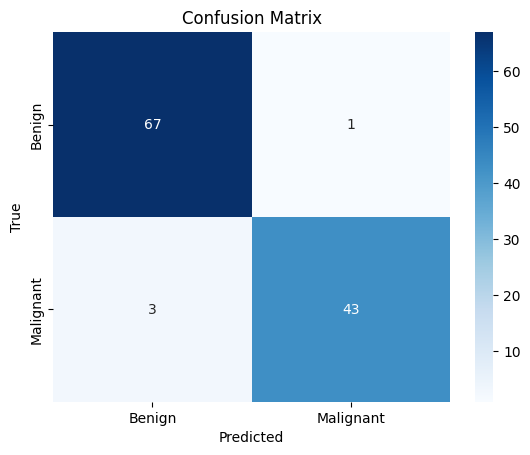

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()